In [2]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
def randomly_crop_string(lst):
    crop_length = random.randint(2, 15)
    start_index = random.randint(0, len(lst) - crop_length)
    return lst[start_index:start_index + crop_length]

def get_diagonals(matrix):
    diagonals = []
    rows, cols = matrix.shape

    # # Upper diagonals
    # for i in range(cols):
    #     diagonal = matrix.diagonal(offset=i)
    #     if len(diagonal) >= 2:
    #         diagonals.append(diagonal)

    # Lower diagonals
    for i in range(1, rows):
        diagonal = matrix.diagonal(offset=-i)
        if len(diagonal) >= 2:
            diagonals.append(diagonal)

    return diagonals



In [243]:
def display_heatmap(matrix,figsize=(9,6)):
    plt.figure(figsize=figsize)
    ax = sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=False)
    plt.show()

def create_arr(randomise=False):
    if randomise:
        l = random.choices([0,1,2,3,4,5,6,7,8,9],k=random.randint(2,15))
        
    else:
        l = [str(x) for x in range(1, 1 + random.randint(2, 1000))]
        l = ''.join(l)
        l = [int(x) for x in randomly_crop_string(l)]

    return len(l), np.array([list(l)],dtype=int).reshape(1,-1)

def findString(randomise=False,visualise=True):
    n, array = create_arr(randomise=randomise)
    ones = np.ones(shape=(n,1),dtype=int)
    m1 = array.T @ ones.T - ones @ array

    if visualise:
        print(array)
        display_heatmap(m1)

    return m1

[[8 4 3 8 5 3 8 6 3 8 7]]


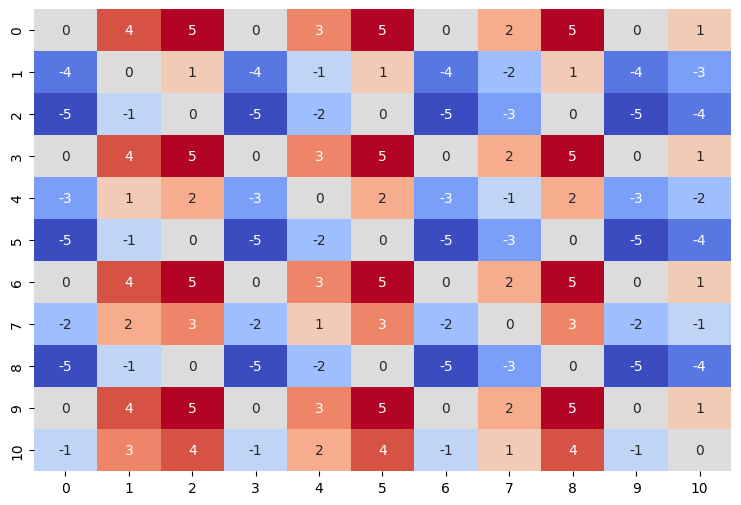

[array([-4, -1,  5, -3, -2,  5, -2, -3,  5, -1]), array([-5,  4,  2, -5,  3,  3, -5,  2,  4]), array([0, 1, 0, 0, 1, 0, 0, 1]), array([-3, -1,  5, -2, -2,  5, -1]), array([-5,  4,  3, -5,  3,  4]), array([0, 2, 0, 0, 2]), array([-2, -1,  5, -1]), array([-5,  4,  4]), array([0, 3])]


In [252]:
m1 = findString(randomise=False)
l_arrays = get_diagonals(m1)

print(l_arrays)

In [272]:
l = [0,0,0,1,0,0,0,1]

def count_zeros_between_ones(lst):
    first_one_index = -1
    zero_count = 0
    one_index_list = []

    for i, num in enumerate(lst):
        if num == 1:
            one_index_list.append(i)
            if first_one_index == -1:
                first_one_index = i
            else:
                return zero_count, one_index_list
        elif first_one_index != -1:
            zero_count += 1

    return zero_count, one_index_list

zero, indices = count_zeros_between_ones(l)

l[indices[0]+1:indices[0]+1+zero]


[0, 0, 0]